In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving edges.csv to edges.csv
Saving gprops.csv to gprops.csv
Saving nodes.csv to nodes.csv


In [ ]:
df_edges  = pd.read_csv("edges.csv")

In [ ]:
df_edges.head()
df_edges

,# source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
73,33,18
74,33,20
75,33,23
76,33,26


In [ ]:
df_edges.columns = ['new_source', 'new_target']

In [ ]:
df_nodes = pd.read_csv("nodes.csv")
df_nodes.columns = ['index', 'name', 'groups', '_pos']

In [ ]:
node_groups = dict(zip(G.nodes, df_nodes['groups']))


In [ ]:
G = nx.from_pandas_edgelist(df_edges, 'new_source', 'new_target')

In [ ]:
pos = nx.spring_layout(G)
pos1 = nx.random_layout(G)
pos2 = nx.kamada_kawai_layout(G)
pos3 = nx.circular_layout(G)

In [ ]:
node_colors = [node_groups[node] for node in G.nodes]
colors_manual = {1: '#216c5c', 2: '#a48ea2'}

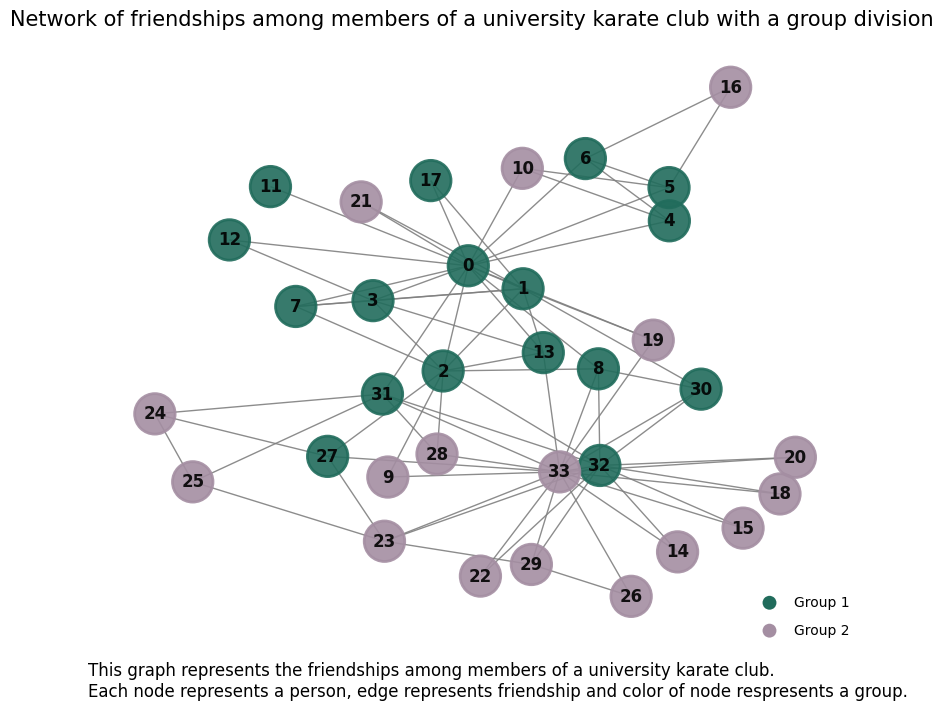

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
nx.draw(G, pos2, with_labels=True, node_size=850,
        node_color=[colors_manual[node_groups[node]] for node in G.nodes],
        font_size=12, font_color="black", font_weight="bold", edge_color="gray",
        linewidths=2, alpha=0.9, ax=ax)

# Wyświetlenie legendy ręcznie przypisanych kolorów
legend_labels = {1: 'Group 1', 2: 'Group 2'}
for group, label in legend_labels.items():
    ax.scatter([], [], c=colors_manual[group], label=label, edgecolors='none', s=100)
plt.title('Network of friendships among members of a university karate club with a group division ', fontsize=15)
# Wyświetlenie legendy
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower right')
description_text = "This graph represents the friendships among members of a university karate club.\nEach node represents a person, edge represents friendship and color of node respresents a group."
plt.text(0, -0.05, description_text, transform=ax.transAxes, fontsize=12, va='center')
plt.savefig('karate_club_network.png', format='png')
# Wyświetlenie grafu
plt.show()